<a href="https://colab.research.google.com/github/sandhyagad/AlternusVera/blob/master/CMPE257FinalExam_Sandhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Configuration of the System:**

 **Notebook Location** The solution/collab notebook of my factor OPINION MINING can be found under : 

 **Github Link:**



 **Colab Link :** https://drive.google.com/open?id=1tC5fmVaAjon2uY74w6qwJvGu6zWw-Cek

**Code structure:** I have placed the solution and displayed relevant tables and charts/graphs after every algorithm /methodology implementation.


**Dataset can be found under the folder :** 
I have saved the datasets under shared folder space created by the professor. The links for the datset are as under:

**Dataset Location**:
https://drive.google.com/open?id=1kguFWPWjGUe1kNqRcBYq4l-rpbi2Momy


# **2. Data Collection :**
**Dataset Source and Description:**

**Dataset 1:**
**Dataset Origin**: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ULHLCB

**Description of the Data:**


# **3. Set Data Narrative :**

The main purpose of this project is to identify essential features that can be trusted to predict if a news is fake or not. These features are realted to the news content. 
Our key classification is to predict if a news is fake or not based on these features. In addition, we are also intended to learn various deep learning and neural networking techniques and compare their performances.

The intended application of the project is for use in applying visibility weights in social media. Using weights produced by this model, social networks can make stories which are highly likely to be fake news less visible.



#### **Strategy :**

I have implemented Sentiment Analysis on NELA 2018 Datset.

A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral.


### **Mounting the drive on the google**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Importing the required Libraries**

In [0]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('popular')
nltk.download('punkt')
import matplotlib.pyplot as plt
from scipy import sparse

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)

In [0]:
nela_data_file = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Final_Exam_Dataset_NELA/data.csv"
label_file = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Final_Exam_Dataset_NELA/labels.csv"

In [0]:
articles_colnames = ['date', 'source', 'name', 'content']

In [0]:
# Read the test, training and valid data from files
# Header = 0 indicates that the first line of the file contains column names,
# As there is no Header, create a column names for each column in the dataset
# delimiter = \t indicates that the fields are seperated by tabs, 
nela_art_data = pd.read_csv(nela_data_file, sep=',', names = articles_colnames, nrows=100000, error_bad_lines=False)
labels_data = pd.read_csv(label_file, sep=',', error_bad_lines=False)             

In [16]:
#Total number of rows
print("Total Number of Rows and Columns: in Articles Data:", nela_art_data.shape)
nela_art_data.drop(nela_art_data.index[0])
nela_art_data.set_index('source')
nela_art_data.head(5)

Total Number of Rows and Columns: in Articles Data: (100000, 4)


,date,source,name,content
0,date,source,name,content
1,2018-02-01,Addicting Info,Donald Trump Jr Likes Fox News Tweet About Spr...,Since Donald Trump Jr. has admitted on Twitter...
2,2018-02-01,Addicting Info,REPORT UK Will Share Less Confidential Info Wi...,The Republican-written and Republican-altered ...
3,2018-02-01,Addicting Info,Trump Jr Mocked To Oblivion After Democracy Di...,The world is still laughing at the Trump admin...
4,2018-02-01,BBC,Battling to save the worlds bananas,Visiting the Matanuska banana plantation is no...


In [17]:
# Check Labels Data
print("Total Number of Rows and Columns: in Labels Data:", labels_data.shape)
#labels_data.iloc[: , [0, 53, 54,55,56,57]]
new_labels_data=labels_data.iloc[: , [0, 52, 53, 54,55,56,57]].copy() 
new_labels_data=new_labels_data.dropna()
new_labels_data.columns = ['source', 'PantsOnFire', 'False', 'MostlyFalse', 'HalfTrue', 'MostlyTrue', 'True']
new_labels_data.set_index('source')
new_labels_data.head(5)

Total Number of Rows and Columns: in Labels Data: (194, 58)


,source,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True
5,Al Jazeera,0.0,1.0,0.0,0.0,0.0,0.0
11,Bipartisan Report,0.0,1.0,0.0,0.0,0.0,0.0
13,Breitbart,2.0,2.0,0.0,0.0,1.0,0.0
15,Buzzfeed,1.0,0.0,0.0,0.0,0.0,0.0
18,CNN,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
merged_nela_art_data = pd.merge(nela_art_data, new_labels_data, on='source') 
print("Total Number of Rows and Columns: in Articles Data:", merged_nela_art_data.shape)
#nela_art_data.head()

Total Number of Rows and Columns: in Articles Data: (31225, 10)


In [0]:
df = merged_nela_art_data
tw = 1
mtw = .5
htw = .25
pfw = 1
fw = .75
mfw = .5
merged_nela_art_data['Verdict'] = (htw*df['HalfTrue'] + mtw*df['MostlyTrue'] + tw*df['True']) - (pfw*df['PantsOnFire'] + fw*df['False'] + mfw*df['MostlyFalse'])
merged_nela_art_data['Verdict'] = df['Verdict'].apply(lambda x: 1 if x > 0 else 0)


In [21]:
merged_nela_art_data.to_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/merged_data.csv', encoding='utf-8', index=False)
merged_nela_art_data

,date,source,name,content,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True,Verdict
0,2018-02-01,Infowars,Adam Schiff FISA Memo Could Lead To Firings Of...,Stocks are red. Trey Gowdy is abruptly retirin...,2.0,1.0,0.0,1.0,0.0,0.0,0
1,2018-02-01,Infowars,Analyses Find White House Immigration Plan Cut...,The White Houses immigration framework would s...,2.0,1.0,0.0,1.0,0.0,0.0,0
2,2018-02-01,Infowars,Congressman FISA Memo Will Shake FBI to its Core,Congressman Jeff Duncan (R-SC) says the releas...,2.0,1.0,0.0,1.0,0.0,0.0,0
3,2018-02-01,Infowars,Intelligence Agencies Join FBI in Push Against...,"Whistleblowers, Republican congressional membe...",2.0,1.0,0.0,1.0,0.0,0.0,0
4,2018-02-01,Infowars,Report The FBI is Threatening Trump Over the F...,The FBI is threatening Donald Trump over the i...,2.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
31220,2018-04-16,Freedom Daily,WATCH Starbucks In Major Trouble After Video I...,The Chief Executive of Starbucks has been forc...,1.0,0.0,1.0,0.0,0.0,0.0,0
31221,2018-04-16,Freedom Daily,Wells Fargo Just Made Huge Move For Gun Owners...,Since the tragic shooting that occurred in Par...,1.0,0.0,1.0,0.0,0.0,0.0,0
31222,2018-04-17,Freedom Daily,Every Former Trump Aide Hit With Nasty Punishm...,Many of the former employees who served under ...,1.0,0.0,1.0,0.0,0.0,0.0,0
31223,2018-04-17,Freedom Daily,Smug David Hogg Announces Another Boycott Nobo...,Just when you thought that David Hoggs time wa...,1.0,0.0,1.0,0.0,0.0,0.0,0


In [22]:
print("The size of verdict = 1 : ", len(df['Verdict'][df['Verdict'] == 1].index))
print("The size of verdict = 0 : ", len(df['Verdict'][df['Verdict'] == 0].index))

The size of verdict = 1 :  3398
The size of verdict = 0 :  27827


In [23]:
train_articles, test_articles = train_test_split(df, test_size=0.4)
print("Total Number of Rows and Columns in Training Dataset: in Articles Data:", train_articles.shape)
print("********************************")
print(train_articles)
print("Total Number of Rows and Columns in Testing Dataset: in Articles Data:", test_articles.shape)
print("********************************")
print(test_articles)


Total Number of Rows and Columns in Training Dataset: in Articles Data: (18735, 11)
********************************
             date              source  ... True Verdict
14418  2018-02-26       Drudge Report  ...  0.0       0
7341   2018-02-09           Breitbart  ...  0.0       0
5978   2018-04-26         True Pundit  ...  0.0       0
29138  2018-02-22  The New York Times  ...  0.0       0
11019  2018-02-06   Bipartisan Report  ...  0.0       0
...           ...                 ...  ...  ...     ...
8193   2018-03-01                 CNN  ...  0.0       0
2415   2018-02-09         True Pundit  ...  0.0       0
31127  2018-05-03               MSNBC  ...  0.0       0
16138  2018-03-25       Drudge Report  ...  0.0       0
23938  2018-03-21       New York Post  ...  0.0       0

[18735 rows x 11 columns]
Total Number of Rows and Columns in Testing Dataset: in Articles Data: (12490, 11)
********************************
             date                 source  ... True Verdict
18777  20

# **4. Data Cleaning and Text Preprocessing**

## 4.1 **Distillation**

Step 1: Data Cleaning and Text Preprocessing

Step 2: Sentiment analysis using Vader Sentiment Analyser

Step 3: LDA Topic Modelling

Step 4: TF-IDF and Cosine Similarity on Sensationalism

Step 5: Doc2Vec based on Sensational Classification

**Steps included in the preprocessing:**

* Remove Special Characters and Punctuations - Remove all Non-Letter Characters using Regular Expression
* Lower case the news - Convert all the characters into lower case letters
* Tokenization - Tokenization is the process splitting a sentence or paragraph into the most basic units.

* Remove Stop Words - "Stop words" is the frequently occurring words that do not carry much meaning such as "a", "and" , "is", "the". In order to use the data as input for machine learning algorithms, we need to get rid of them. Fortunately, there is a function called stopwords which is already built in NLTK library
* Lemmatization - Lemmatization is the process of converting the words of a sentence to its dictionary form
* Stemming - It works by cutting off the end of the word, and in some cases also the beginning while looking for the root.
* Spell Check - Thethe pre-trained model can be downloaded from :https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.


In [0]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [25]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()
train_articles['clean'] = train_articles["name"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_articles), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_articles['clean'] = test_articles["name"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_articles), "articles:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 18735 news: 0.1926615039507548 min


Time to clean, tokenize and stem test data: 
 12490 articles: 0.10718139012654622 min


## 4.2 Google News corpus word2vec
[Word2Vec](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)
Spell Check
You can download the pre-trained model or clone it from GitHub GoogleNews-vectors-negative300: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

It a very huge file that includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

It has 3 million words 300 features 4bytes/feature = ~3.35GB
This file consist of the word2vec - pre-trained Google News corpus (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

The vocabulory list used to train this model shows that Each text file contains 100,000 entries from the model.

Some things are part of this dataset and some are not part of of it. It has stop words like “the”, “also”, “should” and does not have stop words like “a”, “and”, “of”. As I have removed the stop words the complexity is reduced as there is no need to check the spelling for stop words.The model used WinPython-64bit-2.7.10.3 for efficient python distribution on Windows system. Helps to run the scripts in batches.

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/google_dataset/GoogleNews-vectors-negative300.bin.gz',limit=10000,binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [0]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [235]:
print("Before: \n", train_articles['clean'][4] )
t1 = time.time()
#train_articles['clean'] = train_articles['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_articles), "articles:", (t2-t1)/60, "min")

print("\nAfter: \n",train_articles['clean'][4] )
train_articles.head(5)

Before: 
 suprem court showdown could shrink union power

Time to spell check the train data: 
 18735 articles: 9.973843892415365e-07 min

After: 
 suprem court showdown could shrink union power


,level_0,name,label,clean,sentiment_vector,vader_polarity,sentiment_score
1,14418.0,2020 VISION Michelle O to release memoir,0,vision michell releas memoir,"[0.0, 0.6, 0.4, 0.25]",0,0.2500
2,7341.0,Republicans Once Again Fail to Defund Planned ...,0,republican fail defund plan parenthood,"[0.467, 0.533, 0.0, -0.5423]",0,-0.5423
3,5978.0,White House Correspondents Say Trump Makes The...,0,white hous correspond say trump make work harder,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
4,29138.0,A Supreme Court Showdown Could Shrink Unions P...,0,suprem court showdown could shrink union power,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
5,11019.0,NY Daily News Torches Trump Stock Market Crash...,0,ny daili news torch trump stock market crash b...,"[0.164, 0.606, 0.23, 0.2732]",0,0.2732


In [30]:
t1 = time.time()
#test_articles['clean'] = test_articles['clean'].apply(spell_checker)
test_articles.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_articles), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 12490 news: 2.1560986836751303e-05 min


###Saved the trained dataset into a seperate CSV file

In [0]:
train_articles.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/train_processed.csv", sep=',')
test_articles.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/test_processed.csv", sep=',')

# **5. Visualization :**

### WordCloud Formation 
In this step, the most common words used in the text reviews using a word cloud is verified.As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.


In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

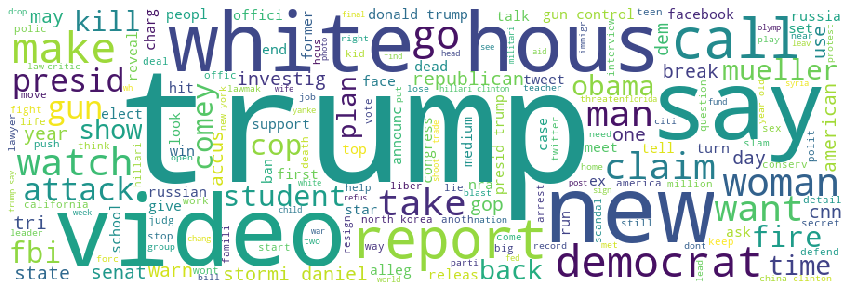

In [33]:
def cloud(data,backgroundcolor = 'white', width = 900, height = 300):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_articles['clean']))

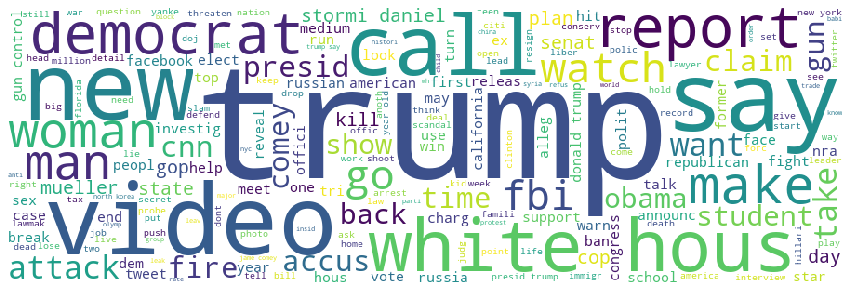

In [0]:
cloud(' '.join(test_articles['clean']))

##### Outcomes from the analysis:

The large words are the words that are frequently appeared in the text/corpus. This helps to know most commonly appearing words in the given dataset.Visualizing the words would be more impactful to make initial assumption about the words appearing the dataset or any given file in NLP.



#6 Feature Implementation on NELA DATASET 

# 1: LDA Topic Modelling


Probabilistic, generative model which uncovers the topics latent to a dataset by assigning weights to words in a corpus, where each topic will assign different probability weights to each word. In LDA, the modelling process revolves around three things: the text corpus, its collection of documents, D and the words W in the documents. Therefore the algorithm attempts to uncover K topics from this corpus.

The LDA algorithm first models documents via a mixture model of topics. From these topics, words are then assigned weights based on the probability distribution of these topics. It is this probabilistic assignment over words that allow a user of LDA to say how likely a particular word falls into a topic. Subsequently from the collection of words assigned to a particular topic, are we thus able to gain an insight as to what that topic may actually represent from a lexical point of view.

In [60]:
train_articles['index'] = train_articles.index
data = train_articles
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
14418,vision michell releas memoir,14418
7341,republican fail defund plan parenthood,7341
5978,white hous correspond say trump make work harder,5978
29138,suprem court showdown could shrink union power,29138


In [61]:
test_articles['index'] = test_articles.index
data = test_articles
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
18777,key nytim editor resign follow investig,18777
19299,china holi see evil,19299
30306,florida governor primari big experi democrat r...,30306
27085,mom wake coma learn four kid die fire,27085


### Split the clean news into list of words.
After performing the cleaning , worrds are listed to individually for analysis 

In [62]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

14418                    [vision, michell, releas, memoir]
7341          [republican, fail, defund, plan, parenthood]
5978     [white, hous, correspond, say, trump, make, wo...
29138    [suprem, court, showdown, could, shrink, union...
Name: clean, dtype: object

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_articles['clean'].map(get_word_tokens)


## Create a function to build the dictionary and tokenized docs for given feature
get_dictionary_print_words function performs below tasks 
 * Dictionary Returns Dictionary given, dataframe and column name
 * Tokenizeddocs Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
 * Dictionary is filtered using Gensim filter_extremes Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.



In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('DICTIONARY Words and occurences:')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local


### Gensim filter_extremes

This selects the tokens that occur less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.



In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n First ITEM in BOW VECTOR : ')
    print(bow_doc_local_0)
    print('\n Preview of  BOW ')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

### Gensim doc2bow

I created a dictionary for each document that shows how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier
### Create a function to build tfidf_corpus from bow_corpus

Next I proceeded with creating tf-idf model object with models.TfidfModel on ‘bow_corpus’ and saved it to ‘tfidf’, then applied transformation to the entire corpus and call it ‘corpus_tfidf’. Lastly I did preview TF-IDF scores for  first document.


In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n First ITEM in TFIDF VECTOR ')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

### Printing top 10 topics by function to run LDA model 

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

### Write a functiom to enrich data with top words, some LDA topics, and top words

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

Function that can enrich topic data to dataframe

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe


### Bag of Words
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

### Create a function to convert text to word tokens from cleaned dataset

In [96]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_articles,
                                                                      'clean')

DICTIONARY Words and occurences:
0 memoir
1 michell
2 releas
3 vision
4 defund
5 fail
6 parenthood
7 plan
8 republican
9 correspond
10 harder

 First ITEM in BOW VECTOR : 
[(0, 1), (1, 1)]

 Preview of  BOW 
Word 0 ("michell") appears 1 time.
Word 1 ("releas") appears 1 time.


### Run LDA with Bag of Words

Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’


In [97]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['trump', 'obama', 'plan', 'presid', 'mueller', 'comey', 'clinton', 'hillari', 'john', 'trade']
1::['trump', 'russian', 'claim', 'investig', 'korea', 'north', 'cohen', 'meet', 'show', 'wife']
2::['trump', 'stormi', 'dont', 'daniel', 'dead', 'photo', 'paul', 'school', 'woman', 'senat']
3::['hous', 'trump', 'white', 'make', 'call', 'kelli', 'watch', 'news', 'john', 'come']
4::['trump', 'student', 'sander', 'sarah', 'pelosi', 'face', 'week', 'colleg', 'american', 'california']
5::['trump', 'accus', 'video', 'medium', 'life', 'control', 'star', 'back', 'report', 'head']
6::['trump', 'year', 'first', 'shoot', 'state', 'court', 'anti', 'parkland', 'video', 'call']
7::['trump', 'facebook', 'year', 'korea', 'north', 'zuckerberg', 'rate', 'south', 'polit', 'model']
8::['trump', 'democrat', 'hous', 'white', 'mueller', 'school', 'like', 'want', 'comey', 'fire']
9::['trump', 'time', 'memo', 'bill', 'democrat', 'comey', 'reveal', 'video', 'russia', 'name']



###  TF-IDF generation with bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.


In [98]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 First ITEM in TFIDF VECTOR 
[(0, 0.7748187019297674), (1, 0.6321835011607547)]



### Run LDA model using Bag of Words

Objective: To get top ten topics with top words.

Train the LDA model with gensim.models.LdaMulticore and save it to ‘lda_model’ 


In [99]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['trump', 'mueller', 'facebook', 'hous', 'open', 'guilti', 'legal', 'yanke', 'month', 'white']
1::['trump', 'korea', 'north', 'dead', 'white', 'hous', 'kill', 'week', 'border', 'south']
2::['trump', 'show', 'video', 'report', 'hous', 'presid', 'comey', 'releas', 'challeng', 'white']
3::['trump', 'home', 'deal', 'woman', 'american', 'begin', 'cohen', 'arrest', 'medium', 'jackson']
4::['trump', 'democrat', 'session', 'peopl', 'want', 'spend', 'question', 'california', 'congress', 'caravan']
5::['trump', 'stormi', 'daniel', 'photo', 'ryan', 'resign', 'claim', 'paul', 'sander', 'sarah']
6::['trump', 'john', 'senat', 'mccabe', 'obama', 'kany', 'report', 'free', 'pompeo', 'video']
7::['trump', 'rate', 'year', 'star', 'porn', 'news', 'propos', 'babi', 'fake', 'collus']
8::['trump', 'school', 'florida', 'shoot', 'alleg', 'child', 'water', 'cant', 'student', 'call']
9::['trump', 'america', 'like', 'polit', 'march', 'comey', 'hope', 'nuclear', 'state', 'video']


### Semisupervised Labeling For the Data
From the trained datasetest , valid data is found for the topic scores for sample data and identified some topics as displayed below:

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

### Add topic number, topic score, topic label, top words for the headline

In [103]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
train_articles = update_lda_results_to_dataset(
    train_articles, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
train_articles.head(2)

,date,source,name,content,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True,Verdict,clean,index,topic_number,lda_score,topic_top_words
14418,2018-02-26,Drudge Report,2020 VISION Michelle O to release memoir,"FILE - In this May 12, 2017, file photo, forme...",2.0,0.0,0.0,0.0,0.0,0.0,0,vision michell releas memoir,14418,0,0.699936,trump obama plan presid mueller comey clinton ...
7341,2018-02-09,Breitbart,Republicans Once Again Fail to Defund Planned ...,The House voted 240-186 to approve the joint f...,2.0,2.0,0.0,0.0,1.0,0.0,0,republican fail defund plan parenthood,7341,0,0.432400,trump obama plan presid mueller comey clinton ...


In [104]:
test_articles = update_lda_results_to_dataset(
    test_articles,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_articles.head()

,date,source,name,content,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True,Verdict,clean,index,topic_number,lda_score,topic_top_words
18777,2018-04-30,Drudge Report,Key NYTIMES editor resigns following investiga...,The Metro Editor for The New York Times has re...,2.0,0.0,0.0,0.0,0.0,0.0,0,key nytim editor resign follow investig,18777,8,0.819976,trump democrat hous white mueller school like ...
19299,2018-02-07,National Review,China Holy See No Evil,Its no great secret that Roman Catholic social...,0.0,0.0,0.0,0.0,0.0,1.0,1,china holi see evil,19299,1,0.549981,trump russian claim investig korea north cohen...
30306,2018-04-15,Buzzfeed,The Florida Governor Primary Is A Big Experime...,Each of the top Democratic contenders for gove...,1.0,0.0,0.0,0.0,0.0,0.0,0,florida governor primari big experi democrat r...,30306,2,0.871394,trump stormi dont daniel dead photo paul schoo...
27085,2018-04-25,New York Post,Mom wakes up from coma to learn her four kids ...,A mom left in a coma following a fire at her h...,0.0,0.0,1.0,0.0,0.0,0.0,0,mom wake coma learn four kid die fire,27085,9,0.560404,trump time memo bill democrat comey reveal vid...
27799,2018-04-30,New York Post,Gloria Allred brings up Bill Cosbys guilty ver...,"Gloria Allred, attorney for some of Bill Cosby...",0.0,0.0,1.0,0.0,0.0,0.0,0,gloria allr bring bill cosbi guilti verdict da...,27799,9,0.819955,trump time memo bill democrat comey reveal vid...



### LDA Distribution of news against Top 10 Topics

#### Objective: 
Each of the M topics is represented by a vector of length V.
Each of the N documents will be represented in the LDA model by a vector of length M 

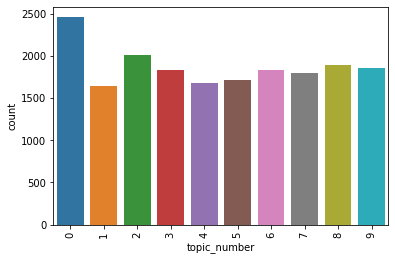

In [113]:
import seaborn as sb
def create_distribution(dataFile):
    dist = sb.countplot(x='topic_number', data=dataFile, palette=None,saturation=0.75, dodge=True,)
    dist.set_xticklabels(dist.get_xticklabels(),rotation=90)

    return dist
# TRAIN Document Vector
create_distribution(train_articles) 

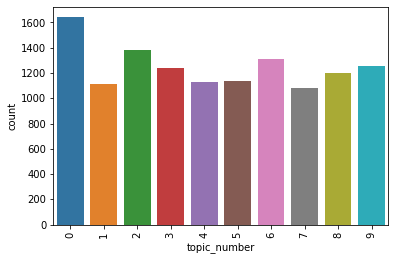

In [114]:
# TEST Document Vector
create_distribution(test_articles)

In [0]:
### Separate CSV with the latest dataset:
train_articles.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/train_lda.csv", sep=',')
test_articles.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/test_lda.csv", sep=',')

In [116]:
#finding the count if articles
train_articles.count()
test_articles.count()


date               12490
source             12490
name               12490
content            12490
PantsOnFire        12490
False              12490
MostlyFalse        12490
HalfTrue           12490
MostlyTrue         12490
True               12490
Verdict            12490
clean              12490
index              12490
topic_number       12490
lda_score          12490
topic_top_words    12490
dtype: int64

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class LDATopicModelling():

    def __init__(self):        

        columnNames = ["index","date", "source", "name", "content", "PantsOnFire", "False", "MostlyFalse", "HalfTrue", "MostlyTrue", "True", "Verdict", "clean", "topic_number","lda_score", "topic_top_words"]
        dataTrain = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/train_lda.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/test_lda.csv', sep=',', header=None, names = columnNames)
        ranger=18735
        ranger1=12490
        #dropping columns
        columnsToRemove = ['date', 'source', 'content', "PantsOnFire", "False", "MostlyFalse", "HalfTrue", "MostlyTrue", "True"]
        dataTrain=dataTrain.reset_index()
        dataTest=dataTest.reset_index()
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)        
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['name'],dataTrain['topic_number'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['name'])
        score = metrics.accuracy_score(dataTest['topic_number'], predicted_LogR)
        print("LDA Topic Model Trained - accuracy is :  %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    

In [121]:
ldaTopicModelling = LDATopicModelling()

LDA Topic Model Trained - accuracy is :  0.246837


In [228]:
# return between 0 and 1, being 0 = True,  1 = Fake
def CMPE257_getLDATopicModellingScore(text):  
    binaryValue, probValue = ldaTopicModelling.predict(text)
    return (float(probValue))

print(CMPE257_getLDATopicModellingScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.08456732547127938


# 2: Opinion Mining 

Sentiment Analysis, or Opinion Mining, is a sub-field of Natural Language Processing (NLP) that tries to identify and extract opinions within a given text. The aim of sentiment analysis is to gauge the attitude, sentiments, evaluations, attitudes and emotions of a speaker/writer based on the computational treatment of subjectivity in a text. According to many research, sentiment analysis is important for fake news identification. A research suggested that if a news is positive the probablity of it being fake is more. Text Sentiment is derived using Vader Sentiment Library. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive, negative or neutral.

**Buiness Objective** The sentiment polarity score is used to tag the document as Positive , Negative or Neutral based on the max polarity score from the Vader analyser. The values are then normalized using log to achieve better accuracy. I have not used the encoded label as is but normalized the value so that the classifier does not weigh a particular sentiment more than the other. Hence, normalization using math.log() is performed.

In [0]:
data_file = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Final_Exam_Dataset_NELA/data.csv"
label_file = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Final_Exam_Dataset_NELA/labels.csv"
articles_colnames = ['date', 'source', 'name', 'content']
senti_colname = 'name'
remove_col = 'content'

Read the test, training and valid data from files
Header = 0 shows that first line of the file contains column names,
In the given dataset there is no Header, so we must create a column names for each column in the dataset

In [0]:
 articles_data = pd.read_csv(data_file, sep=',', names = articles_colnames, nrows=50000, error_bad_lines=False)
labels_data = pd.read_csv(label_file, sep=',', error_bad_lines=False) 

### Printing All the rows and columns witg the labels

In [148]:
#All rows
print("Number of Rows and Columns dataframe :\n", articles_data.shape)
articles_data.drop(articles_data.index[0])
articles_data.set_index('source')
articles_data.head()

Number of Rows and Columns dataframe :
 (50000, 4)


,date,source,name,content
0,date,source,name,content
1,2018-02-01,Addicting Info,Donald Trump Jr Likes Fox News Tweet About Spr...,Since Donald Trump Jr. has admitted on Twitter...
2,2018-02-01,Addicting Info,REPORT UK Will Share Less Confidential Info Wi...,The Republican-written and Republican-altered ...
3,2018-02-01,Addicting Info,Trump Jr Mocked To Oblivion After Democracy Di...,The world is still laughing at the Trump admin...
4,2018-02-01,BBC,Battling to save the worlds bananas,Visiting the Matanuska banana plantation is no...


In [157]:
# Check Labels Data
print("Total Number of Rows and Columns: in Labels Data:", labels_data.shape)
new_labels_data=labels_data.iloc[: , [0, 52, 53, 54,55,56,57]].copy() 
new_labels_data=new_labels_data.dropna()
new_labels_data.columns = ['source', 'PantsOnFire', 'False', 'MostlyFalse', 'HalfTrue', 'MostlyTrue', 'True']
new_labels_data.set_index('source')
new_labels_data.head(2)

Total Number of Rows and Columns: in Labels Data: (194, 58)


,source,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True
5,Al Jazeera,0.0,1.0,0.0,0.0,0.0,0.0
11,Bipartisan Report,0.0,1.0,0.0,0.0,0.0,0.0


In [158]:
merged_articles_data = pd.merge(articles_data, new_labels_data, on='source') 
print("Total Number of Rows and Columns in merged article data:", merged_articles_data.shape)
merged_articles_data.head(2)

Total Number of Rows and Columns in merged article data: (15855, 10)


,date,source,name,content,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True
0,2018-02-01,Infowars,Adam Schiff FISA Memo Could Lead To Firings Of...,Stocks are red. Trey Gowdy is abruptly retirin...,2.0,1.0,0.0,1.0,0.0,0.0
1,2018-02-01,Infowars,Analyses Find White House Immigration Plan Cut...,The White Houses immigration framework would s...,2.0,1.0,0.0,1.0,0.0,0.0


In [0]:
df = merged_articles_data
tw = 1
mtw = .5
htw = .25
pfw = 1
fw = .75
mfw = .5


merged_articles_data['Verdict'] = (htw*df['HalfTrue'] + mtw*df['MostlyTrue'] + tw*df['True']) - (pfw*df['PantsOnFire'] + fw*df['False'] + mfw*df['MostlyFalse'])
merged_articles_data['Verdict'] = df['Verdict'].apply(lambda x: 1 if x > 0 else 0)

In [162]:
merged_articles_data.to_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/merged_data.csv', encoding='utf-8', index=False)
merged_articles_data.head(2)

,date,source,name,content,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True,Verdict
0,2018-02-01,Infowars,Adam Schiff FISA Memo Could Lead To Firings Of...,Stocks are red. Trey Gowdy is abruptly retirin...,2.0,1.0,0.0,1.0,0.0,0.0,0
1,2018-02-01,Infowars,Analyses Find White House Immigration Plan Cut...,The White Houses immigration framework would s...,2.0,1.0,0.0,1.0,0.0,0.0,0


In [180]:
op_train_news, op_test_news = train_test_split(merged_articles_data, test_size=0.3)
print('train shape:',op_train_news.shape)
print('test shape:', op_train_news.shape)
train_news.iloc[0:2]

train shape: (11098, 11)
test shape: (11098, 11)


,date,source,name,content,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True,Verdict,clean
7080,2018-02-24,Daily Mail,Trump sets military parade date for Veterans Day,Donald Trump's plans for a controversial milit...,0.0,0.0,1.0,0.0,0.0,0.0,0,trump set militari parad date veteran day
6196,2018-03-20,The Gateway Pundit,Its as If They Want to Lose in November Republ...,Flake is not alone.\r\n\r\n Republican leaders...,0.0,1.0,0.0,0.0,1.0,1.0,1,want lose novemb republican leader fund billio...


In [0]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [183]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
op_train_news['clean'] = op_train_news[senti_colname].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(op_train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
op_test_news['clean'] = op_test_news[senti_colname].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(op_test_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 11098 news: 0.09696415662765503 min


Time to clean, tokenize and stem test data: 
 4757 news: 0.04124862750371297 min


In [0]:
# op_train_news.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/opinion_train_processed.csv", sep=',')
# op_test_news.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/opinion_test_processed.csv", sep=',')

In [0]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
#print_sentiment_scores(train_news['clean'])

In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    return sentimentVector

In [189]:
sentiment = []
vader_pol = []
cmp_score = []
for row in op_train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
op_train_news['sentiment_vector'] = sentiment
op_train_news['vader_polarity'] = vader_pol
op_train_news['sentiment_score'] = cmp_score
op_train_news.head(2)

,date,source,name,content,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True,Verdict,clean,sentiment_vector,vader_polarity,sentiment_score
5641,2018-02-12,The Gateway Pundit,SICK Artist Who Painted Obamas Official Portra...,"UPDATE: It turns that Wiley, the racist artist...",0.0,1.0,0.0,0.0,1.0,1.0,1,sick artist paint obama offici portrait known ...,"[0.248, 0.752, 0.0, -0.5106]",0,-0.5106
14427,2018-03-22,New York Post,A quickly growing Bruins star is still taking ...,For those not fully immersed in the Bruins sen...,0.0,0.0,1.0,0.0,0.0,0.0,0,quick grow bruin star still take harvard class,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


In [192]:
sentiment = []
vader_pol = []
cmp_score = []
for row in op_test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
op_test_news['sentiment_vector'] = sentiment
op_test_news['vader_polarity'] = vader_pol
test_news['sentiment_score'] = cmp_score
op_test_news.head(2)

,date,source,name,content,PantsOnFire,False,MostlyFalse,HalfTrue,MostlyTrue,True,Verdict,clean,sentiment_vector,vader_polarity
14380,2018-03-21,New York Post,Son charged with killing his adoptive parents,"HELENA, Mont. A 21-year-old Helena man is cha...",0.0,0.0,1.0,0.0,0.0,0.0,0,son charg kill adopt parent,"[0.5, 0.319, 0.181, -0.6124]",-1
11915,2018-02-23,New York Post,20-year-old on drugs who gouged own eyes out n...,The family of a South Carolina woman who gouge...,0.0,0.0,1.0,0.0,0.0,0.0,0,year old drug goug eye blind mom say,"[0.278, 0.722, 0.0, -0.4019]",0


In [0]:
op_train_news.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/train_opinion.csv", sep=',')
op_test_news.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/test_opinion.csv", sep=',')

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class OpinionMining():

    def __init__(self):        

        self.pipedict = dict()
        #columnNames = ['date',	'source',	'name', 'content',	'PantsOnFire',	'False',	'MostlyFalse',	'HalfTrue',	'MostlyTrue',	'True',	'Verdict',	'clean',	'sentiment_vector',	'vader_polarity',	'sentiment_score']
        dataTrain = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/train_opinion.csv', sep=',')
        dataTest = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Insurgents/Sandhya/test_opinion.csv', sep=',')

        #drop some columns
        columnsToRemove = ['date',	'source',	remove_col,	'PantsOnFire',	'False',	'MostlyFalse',	'HalfTrue',	'MostlyTrue',	'True',	'Verdict', 'sentiment_vector']

        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]

        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
    
        funcDict = {"DescionTree": DecisionTreeClassifier(),
                    "Random Forest": RandomForestClassifier(n_estimators=100),
                    "KNN ": KNeighborsClassifier(n_neighbors=8), 
                    "SVC": SVC(),
                    "NB": MultinomialNB(),
                    "xgb_clf": XGBClassifier()
                    }
             
        p = PrettyTable(["Algorithim", "Accuracy", "Classification Report"])
        p.padding_width = 1
        p.float_format='.8'
        for key in p.align.keys():
            p.align[key] = 'l'

        high_score = 0.0
        
        for key,value1 in funcDict.items():
               self.rf_pipeline = Pipeline([
                   ('RFCV', tfidfV),
                   ('clf',RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0))
               ])
               self.rf_pipeline.fit(dataTrain[senti_colname], dataTrain['vader_polarity'])
               predicted_RF= self.rf_pipeline.predict(dataTest[senti_colname])
               score = metrics.accuracy_score(dataTest['vader_polarity'], predicted_RF)
               cls_report=classification_report(dataTest['vader_polarity'],predicted_RF)
               self.pipedict[key]=self.rf_pipeline
               print(score)
               if score > high_score :
                 high_score = score
                 self.model = self.rf_pipeline
               p.add_row([key,score,cls_report])
               p.add_row(["------------------------","-------------","--------------------------------------------------"])

        print(p)

    def predict(self, text):
       predicted = self.pipedict["Random Forest"].predict([text])
       predicedProb = self.pipedict["Random Forest"].predict_proba([text])[:,1]
       # predicted = self.model.predict([text])
       # predicedProb = self.model.predict_proba([text])[:,1]
       return bool(predicted), float(predicedProb)

       OpinionMining.predict_proba([test])[:,1]

In [220]:
OpinionMiningObj = OpinionMining()


0.8967619848612279
0.8967619848612279
0.8967619848612279
0.8967619848612279
0.8967619848612279
0.8967619848612279
+--------------------------+---------------+-------------------------------------------------------+
| Algorithim               | Accuracy      | Classification Report                                 |
+--------------------------+---------------+-------------------------------------------------------+
| DescionTree              | 0.89676198    |               precision    recall  f1-score   support |
|                          |               |                                                       |
|                          |               |           -1       0.00      0.00      0.00       360 |
|                          |               |            0       0.90      1.00      0.95      4265 |
|                          |               |            1       0.00      0.00      0.00       131 |
|                          |               |                                  

After this when we test with any headline text , the answer returned will be between 0 and 1 where:
 0 = True
 1 = Fake

In [226]:
def CMPE257FINAL_getOpinionMiningScore(text):  
    binaryValue, probValue = OpinionMiningObj.predict(text)
    return (float(probValue))

print(CMPE257FINAL_getOpinionMiningScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.8971388145116126


old code


### TF-IDF and Cosine Similarity
#### TF-IDF

TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)



## FINAL COMBINED MODEL

In [234]:
import warnings
warnings.filterwarnings('ignore')

def isFakeNews(text, headline="", numAuthors = 0, source = ""):
    accur = [0.1, 0.90] # using the (normalized) accuracy as weigths
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0
    prob = []    
    if (headline != ""):
        prob.append(w[0] * CMPE257_getLDATopicModellingScore(headline))
        sumW += w[1]
    if (headline != ""):
        prob.append(w[1] * CMPE257FINAL_getOpinionMiningScore(headline))
        sumW += w[1]
     
    probTotal = sum(prob[0:len(prob)]) / sumW
    return probTotal
    
result = isFakeNews("The bombshell report that implicates more than 20 college programs","Seton Halls plan to prove innocence in FBI corruption probe", 0, "New York Post")

if result > 0.5:
    print("This news is FAKE !!!")
else:
    print("This is not a FAKE news.!!!")

This is not a FAKE news.!!!
